# **_Least Squares Modeling and Analysis_**

_Takes mock data, builds a Least Squares model, visualizes and evaluates the results._

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Intro:_**

This notebook demonstrates concepts from coding challenges I studied in Mike X. Cohen's Linear Algebra course on Udemy.

Essentially, this is my homework, which serves as a step-by-step review and a future quick-reference.

Visit the course here:

-   [**_Udemy Course_**](https://www.udemy.com/course/linear-algebra-theory-and-implementation)

-   [**_Mike X. Cohen's Website_**](https://www.mikexcohen.com/)

This course is helping not only with Linear Algebra, but has significantly improved my coding skills.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Goals:_**

1. Import and briefly explore a real-world (synthetic) dataset.

2. Build a linear model using the Least Squares method.

3. Evaluate model fit ($R^2$, residuals) and interpret coefficients.

4. Visualize relationships between predictors and sleep duration.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Preliminary Data Analysis_**

I'm utilizing the dataset found here:

-   https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

Columns in play:

-   `Age`: The age of the person in years.

-   `Sleep Duration` (hours): The number of hours the person sleeps per day.

-   `Quality of Sleep` (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.

-   `Physical Activity Level` (minutes/day): The number of minutes the person engages in physical activity daily.

-   `Stress Level` (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

**_Note:_**

These data are synthetic and created by the [**author**](https://www.kaggle.com/uom190346a) for illustrative purposes. 

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Create the Model_**

Here's how I'll organize things:

**_Target/Outcome Vector:_**

-   `Sleep Duration`

**_Design Matrix Predictors:_**

-   `Age`

-   `Quality of Sleep`

-   `Physical Activity Level`

-   `Stress Level`

$
\begin{aligned}
    & \Large{\hat{d} = \beta_0 + \beta_1 a + \beta_2 q + \beta_3 p + \beta_4 s}
    \\ \\
    & \hat{d} = \textbf{Sleep Duration}
    \\
    & a = \textbf{Age}
    \\
    & q = \textbf{Quality of Sleep}
    \\
    & p = \textbf{Physical Activity Level}
    \\
    & s = \textbf{Stress Level}
\end{aligned}
$

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Prepare the Data_**

In [2570]:
# Import libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2571]:
# Indicate local path to dataset:
sleep_csv_path = "./data/Sleep_health_and_lifestyle_dataset.csv"

# Instantiate CSV as Pandas dataset: 
df_sleep = pd.read_csv(sleep_csv_path)

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Inspect the Dataset_**

_Get oriented._

In [2572]:
print(df_sleep.shape)

(374, 13)


In [2573]:
print(df_sleep.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [2574]:
print(df_sleep.sample())

    Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
74         75   Male   33     Doctor             6.0                 6   

    Physical Activity Level  Stress Level BMI Category Blood Pressure  \
74                       30             8       Normal         125/80   

    Heart Rate  Daily Steps Sleep Disorder  
74          72         5000            NaN  


In [2575]:
print(df_sleep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [2576]:
print(df_sleep.isna().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Choose Predictors_**

Outcome/target variable: `Sleep Duration` (hours).

In [2577]:
# Get rid of:
df_sleep = df_sleep.drop(
    columns=[
        "Person ID",
        "Gender",
        "Occupation",
        "BMI Category",
        "Blood Pressure",
        "Heart Rate",
        "Daily Steps",
        "Sleep Disorder",
    ],
)

In [2578]:
# Keep:
col_names = [
    "Age",
    "Quality of Sleep",
    "Physical Activity Level",
    "Stress Level",
]

col_names = ["Intercept"] + col_names

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Fit the Model and Compute_**

In [2579]:
# Dataset columns to use:
df_X = df_sleep[col_names[1:]].copy()

# Convert columns to NumPy:
X_cols = df_X.to_numpy(float)

In [2580]:
# Provide baseline value vector:
intercept = np.ones(len(df_sleep), dtype=float)

In [2581]:
# Build Design Matrix:
X = np.column_stack([intercept, X_cols])

# Instantiate outcome vector:
y = df_sleep["Sleep Duration"].to_numpy(float)

In [2582]:
# Fit the model and compute:
beta = np.linalg.lstsq(X, y, rcond=None)[0]

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


## **_Data Analysis_**

_Utilizing unstandarized betas..._

In [2583]:
# Predicted/fitted values:
y_hat = X @ beta

# Errors:
resid = y - y_hat

# Coefficient of determination:
r2 = 1 - sum(resid**2) / sum((y - np.mean(y))**2)

print(f"R^2 (proportion of variance explained): {r2:.2f}")
print("=> 1 indicates a better fit.")
print("0 <= indicates a poor fit.")

R^2 (proportion of variance explained): 0.79
=> 1 indicates a better fit.
0 <= indicates a poor fit.


The model explains about `79%` of observed variance.

~`21%` remains in residuals (noise, error, etc...)

In [2584]:
# Pick nice colors for the plot:
colors = ["slateblue", "firebrick", "darkgoldenrod", "forestgreen"]

col_labels = [
    "Age (yrs)",
    "Quality of Sleep (1-10)",
    "Physical Activity Level (min per day)",
    "Stress Level (1-10)",
]

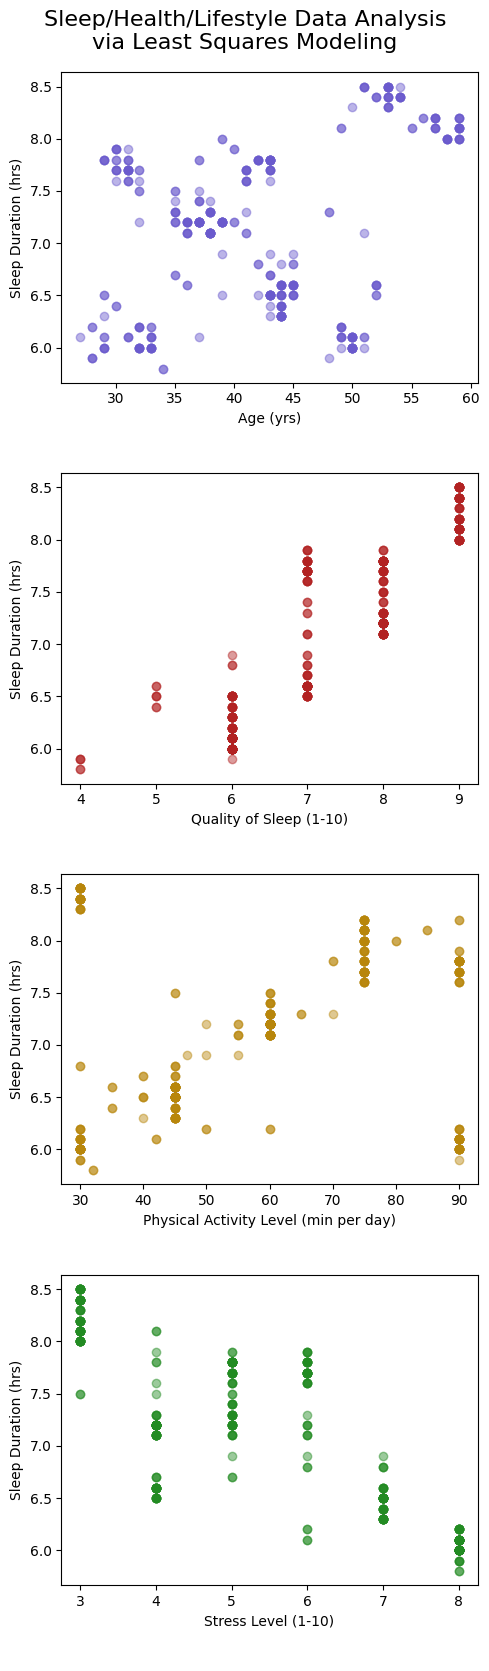

In [2585]:
# Populate subplots with relationship of each X column
#  to outcome:
fig, ax = plt.subplots(4, 1, figsize=(5, 17))

for i in range(len(col_names[1:])):
    ax[i].plot(X[:, i + 1], y, "o", color=colors[i], alpha=0.45)
    ax[i].set_xlabel(f"{col_labels[i]}\n\n")
    ax[i].set_ylabel("Sleep Duration (hrs)")

sup_title = "Sleep/Health/Lifestyle Data Analysis"
sup_title += "\nvia Least Squares Modeling\n"
plt.suptitle(sup_title, size=16)
plt.tight_layout()
plt.show()    

In [2586]:
# Coefficients with labels:
beta_coef_dict = dict(zip(col_names, beta))
pd.Series(beta_coef_dict).sort_values()

Stress Level              -0.063190
Age                       -0.009420
Physical Activity Level    0.002801
Quality of Sleep           0.525839
Intercept                  3.858628
dtype: float64

##### **_`Sleep Quality`:_**

-   `Sleep Duration` is most strongly associated with **Sleep Quality**.

-   Each one-point increase in quality predicts **~`0.53` hours** (~`32` min) change in sleep.

-   **NOTICEABLE INCREASE IN SLEEP DURATION AS SLEEP QUALITY INCREASES.**

##### **_`Stress Level`:_**

-   Each additional point of stress predicts **~`–0.06` hours** (~`-4` min) change in sleep.

-   **SMALL DECREASE IN SLEEP DURATION AS STRESS INCREASES.**

##### **_`Age`:_**

-   About **`–0.009` hours** (~`32` s) change in sleep per additional year of age.

-   **VERY SMALL DECREASE IN SLEEP DURATION AS AGE INCREASES.**

##### **_`Physical Activity`:_**

-   About **`+0.003` hours** (~`11` s) change in sleep per minute of activity. Essentially no effect.

-   **VERY, VERY SMALL INCREASE IN SLEEP DURATION WITH MORE PHYSICAL ACTIVITY.**

-   The weakest association, smallest coefficient magnitude.

_I need a nap._

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Portfolio: https://www.andrewblais.dev/

</font>

<font size=1>

```python
# python
```

</font>

<font size=5 style="font-family: Courier; font-weight: 700; text-align: center; color: ivory; text-shadow: orangered 0.05rem 0.05rem 0.65rem, goldenrod 0.05rem -0.05rem 0.65rem, dodgerblue -0.05rem -0.05rem 0.65rem; magenta -0.05rem 0.05rem 0.65rem">

All stable processes we shall predict.
<br>

<font size=4>_All unstable processes we shall control._</font>

<font size=2>_JvN_</font>

</font>